
# Step 1: Theoretical Foundation
This section will explore the significance of data quality in machine learning, highlighting key concepts and methodologies for ensuring high-quality data.

A. Data Quality in Machine Learning
1. Overview of Data Quality

Definition: High-quality data in machine learning is accurate, complete, consistent, and relevant.
Importance: The quality of data directly influences the reliability and performance of machine learning models.
2. Impact of Poor Data Quality

Consequences: Low-quality data can lead to decreased accuracy, biased outcomes, and potentially misleading insights.
Real-World Examples: Illustrate with examples where poor data quality led to significant issues in model outcomes.
B. Key Concepts
1. Data Cleaning Techniques

Significance: Cleaning data is crucial for removing errors and inconsistencies.
Methods: Discuss data transformation, normalization, and outlier handling.
2. Data Profiling

Techniques: Statistical analysis to understand data characteristics.
Tools & Methods: Introduction to tools for profiling data like pandas .describe() in Python.
3. Data Normalization

Scaling and Standardizing: Discuss why and how data is scaled.
Methods: Min-Max Scaling, Z-score normalization, and their applicability.
4. Probability Distribution

Data Distribution Types: Normal, skewed distributions, etc.
Significance: Role in model selection and data preprocessing.
5. Handling Missing Data

Patterns of Missingness: Random vs. systematic missing data.
Impact on Models: How missing data can affect model outcomes.
6. Imputation Techniques

Approaches: Mean/Median imputation, KNN, multiple imputation.
Selection Criteria: Choosing an imputation method based on data characteristics.

# Step 2: Introduction to the Worked Example Problem

In this step, we'll dive into a practical example using a dataset from the Indian Premier League (IPL) 2023 season. The dataset, 'batting statistics.csv', contains detailed batting statistics of players participating in the season.

* Problem Context
Dataset Overview: 'batting statistics.csv' includes player names, runs scored, balls faced, number of boundaries, strike rates, and other key batting metrics.
Relevance: Analyzing such data is crucial in sports analytics to identify top performers, strategize game plans, and understand player contributions.
* Importance in Data Science
Application: The dataset serves as an excellent example to demonstrate data cleaning, normalization, and imputation techniques in a real-world scenario.
Core Principles Emphasized:
1. Data Cleaning: Addressing issues like missing values, inconsistencies, or incorrect formats in the dataset.
2. Data Normalization: Adjusting features like runs scored and strike rate on a common scale for comparative analysis.
3. Handling Missing Data and Imputation: Dealing with incomplete records, possibly due to unrecorded or misreported statistics.
4. Feature engineering: Create new features based on existing data, such as batting average against different bowlers or performance on specific grounds.
5. Model selection and training: Choose appropriate algorithms (e.g., regression for run prediction, classification for dismissal type) and train models on the prepared data.
6. Model evaluation and interpretation: Evaluate the accuracy and performance of your models, analyze errors, and draw meaningful conclusions from the results.
7. Communication and visualization: Present your findings in a clear and compelling way using visualizations and storytelling techniques.

# Step 3: Analyzing the worked Example



In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder


In [89]:
#Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/KodandRam/IPL/main/batting_summary.csv')

# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15083 entries, 0 to 15082
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IPL Edition    15083 non-null  int64  
 1   Date           15083 non-null  object 
 2   Time           15083 non-null  object 
 3   Stadium        15083 non-null  object 
 4   City           15083 non-null  object 
 5   Match Details  15083 non-null  object 
 6   Team 1         15083 non-null  object 
 7   Team 2         15083 non-null  object 
 8   Team Batting   15083 non-null  object 
 9   Total Runs     15083 non-null  int64  
 10  Total Wickets  15083 non-null  int64  
 11  Batsman Names  14785 non-null  object 
 12  Out/Not Out    14810 non-null  object 
 13  Balls Played   14824 non-null  float64
 14  Runs Scored    15027 non-null  object 
 15  Fours          14808 non-null  float64
 16  Sixes          14819 non-null  float64
 17  Strike Rate    14820 non-null  float64
dtypes: flo

In [90]:
# Display the first few rows of the dataframe
df.head()

,IPL Edition,Date,Time,Stadium,City,Match Details,Team 1,Team 2,Team Batting,Total Runs,Total Wickets,Batsman Names,Out/Not Out,Balls Played,Runs Scored,Fours,Sixes,Strike Rate
0,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Conway,b Shami,6.0,1,0.0,0.0,16.67
1,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Ruturaj Gaikwad,c Shubman Gill b Alzarri Joseph,50.0,92,4.0,9.0,184.00
2,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Moeen,c W Saha b Rashid Khan,17.0,23,4.0,1.0,135.29
3,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Stokes,c W Saha b Rashid Khan,6.0,7,1.0,0.0,116.67
4,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Rayudu,b Joshua Little,12.0,12,0.0,1.0,100.00


In [91]:
df.drop_duplicates(inplace=True)
df.head()

,IPL Edition,Date,Time,Stadium,City,Match Details,Team 1,Team 2,Team Batting,Total Runs,Total Wickets,Batsman Names,Out/Not Out,Balls Played,Runs Scored,Fours,Sixes,Strike Rate
0,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Conway,b Shami,6.0,1,0.0,0.0,16.67
1,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Ruturaj Gaikwad,c Shubman Gill b Alzarri Joseph,50.0,92,4.0,9.0,184.00
2,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Moeen,c W Saha b Rashid Khan,17.0,23,4.0,1.0,135.29
3,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Stokes,c W Saha b Rashid Khan,6.0,7,1.0,0.0,116.67
4,2023,2023-03-31,07:30 PM,Narendra Modi Stadium,Ahmedabad,"Gujarat Titans vs Chennai Super Kings, 1st Match",Gujarat Titans,Chennai Super Kings,Chennai Super Kings Innings,178,7,Rayudu,b Joshua Little,12.0,12,0.0,1.0,100.00


## Handling Missing Values

In [92]:
df.isnull().sum()

IPL Edition        0
Date               0
Time               0
Stadium            0
City               0
Match Details      0
Team 1             0
Team 2             0
Team Batting       0
Total Runs         0
Total Wickets      0
Batsman Names    298
Out/Not Out      273
Balls Played     259
Runs Scored       56
Fours            275
Sixes            264
Strike Rate      263
dtype: int64

In [93]:
#Mode Imputation
batsman_mode = df['Batsman Names'].mode()[0]
out_mode = df['Out/Not Out'].mode()[0]

df['Batsman Names'] = df['Batsman Names'].fillna(batsman_mode)
df['Out/Not Out'] = df['Out/Not Out'].fillna(out_mode)


In [94]:
#Median Imputation
import pandas as pd
# Function to convert to numeric and handle errors
def to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return np.nan

# Columns to clean and impute
columns_to_clean_and_impute = ['Balls Played', 'Runs Scored', 'Fours', 'Sixes', 'Strike Rate']

# Cleaning non-numeric data and converting columns to numeric
for column in columns_to_clean_and_impute:
    df[column] = df[column].apply(to_numeric)

# Median imputation
median_imputer = SimpleImputer(strategy='median')
df[columns_to_clean_and_impute] = median_imputer.fit_transform(df[columns_to_clean_and_impute])




In [95]:
df.isnull().sum()

IPL Edition      0
Date             0
Time             0
Stadium          0
City             0
Match Details    0
Team 1           0
Team 2           0
Team Batting     0
Total Runs       0
Total Wickets    0
Batsman Names    0
Out/Not Out      0
Balls Played     0
Runs Scored      0
Fours            0
Sixes            0
Strike Rate      0
dtype: int64

## Data Normalization

In [96]:
# Display summary statistics
print(df.describe())


        IPL Edition    Total Runs  Total Wickets  Balls Played   Runs Scored  \
count  15083.000000  15083.000000   15083.000000  15083.000000  15083.000000   
mean    2015.629185    155.147186       6.604058     14.951336     19.285354   
std        4.669824     30.870562       2.286899     13.480841     21.018613   
min     2008.000000      2.000000       0.000000      0.000000      0.000000   
25%     2012.000000    136.000000       5.000000      5.000000      3.000000   
50%     2016.000000    157.000000       7.000000     11.000000     12.000000   
75%     2020.000000    176.000000       8.000000     21.000000     28.000000   
max     2023.000000    263.000000      10.000000     73.000000    175.000000   

              Fours         Sixes   Strike Rate  
count  15083.000000  15083.000000  15083.000000  
mean       1.741298      0.738712    109.224214  
std        2.272051      1.326274     67.989764  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.00

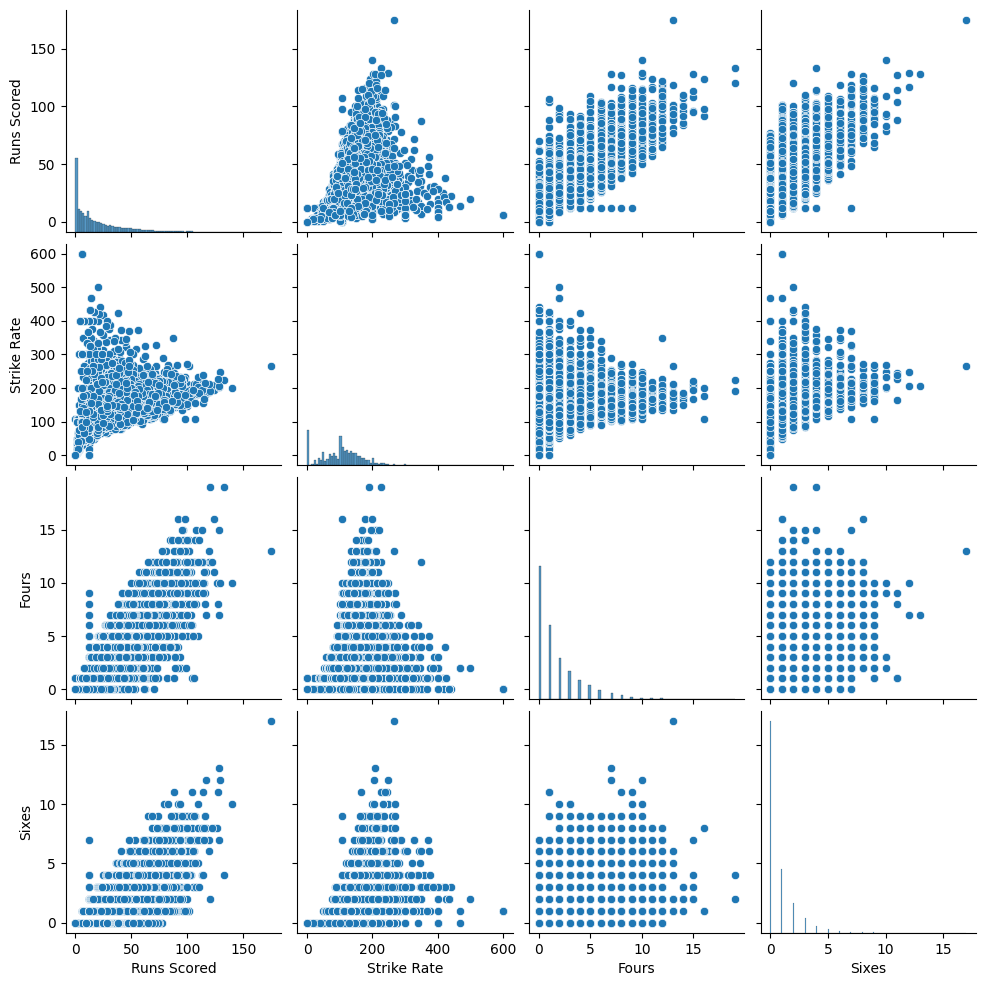

In [77]:
sns.pairplot(df[['Runs Scored', 'Strike Rate', 'Fours', 'Sixes']])
plt.show()


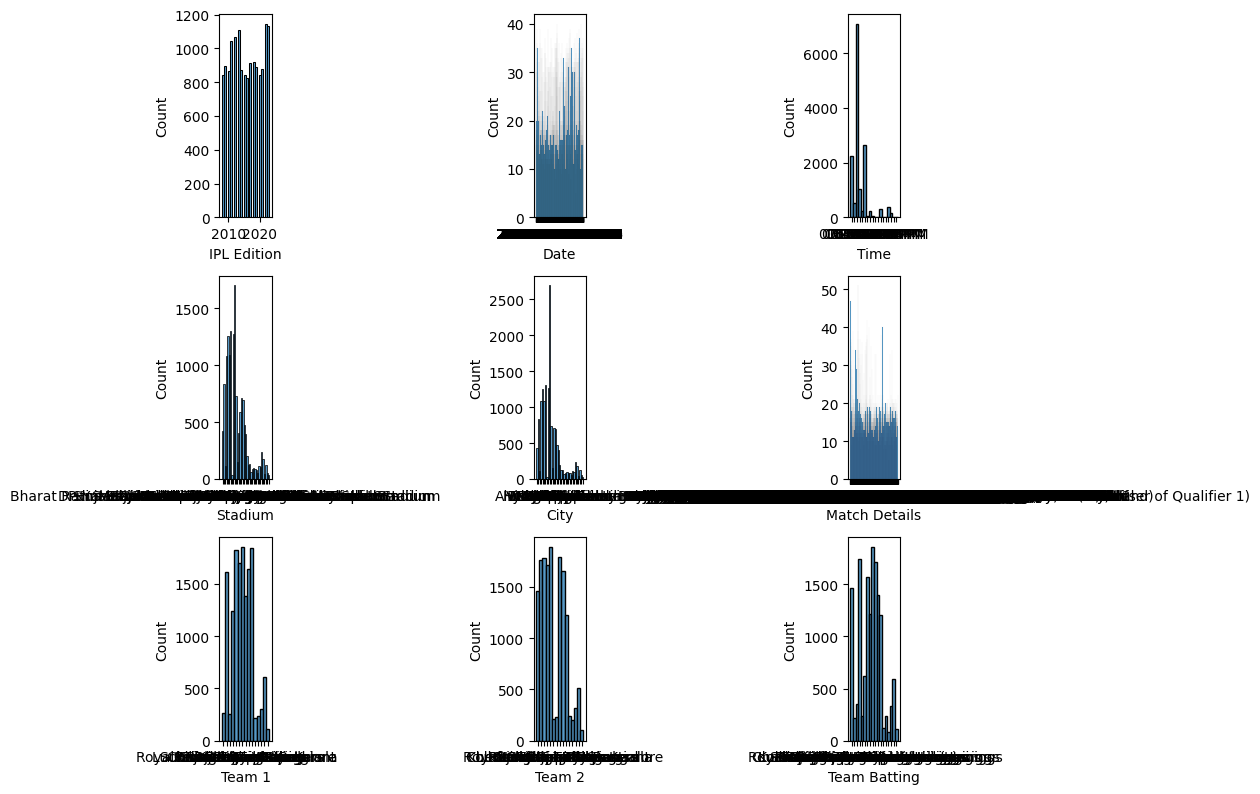

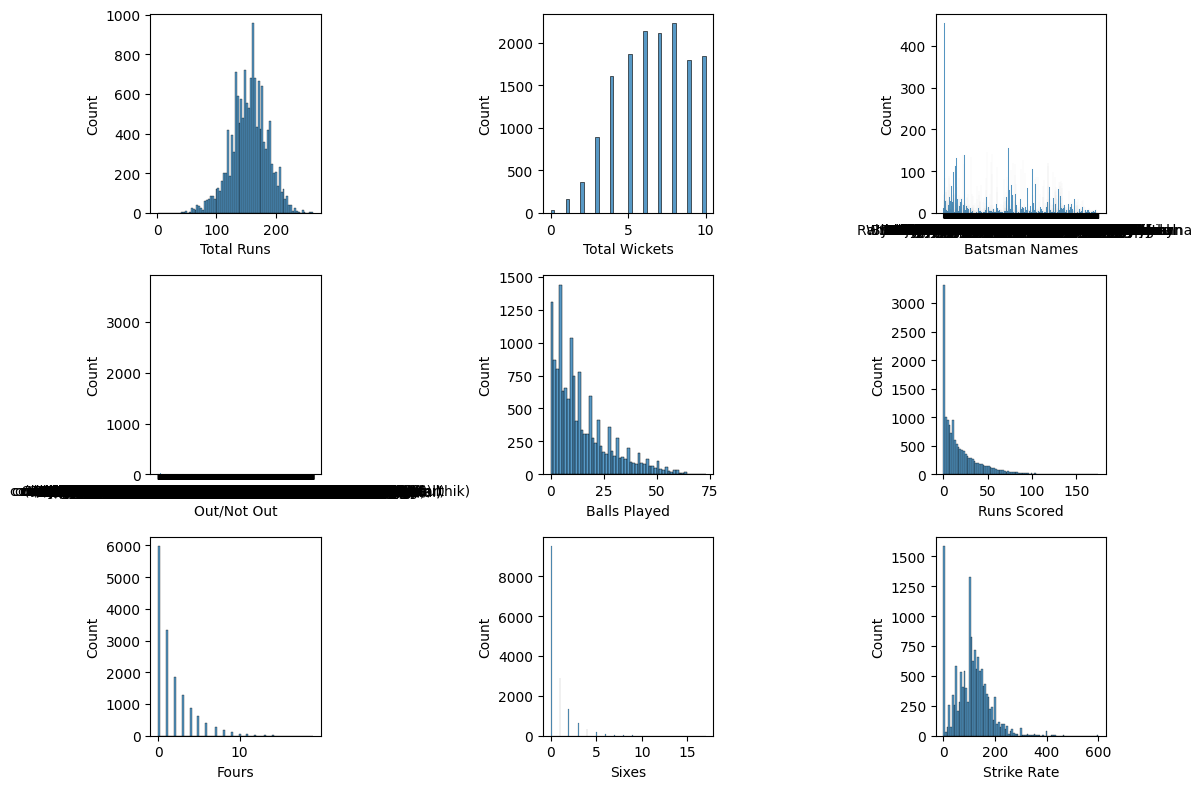

In [78]:
import math

num_columns = len(df.columns)
rows = 3
cols = 3
num_plots_per_figure = rows * cols
num_figures = math.ceil(num_columns / num_plots_per_figure)

for fig_num in range(num_figures):
    plt.figure(figsize=(12, 8))
    for i in range(num_plots_per_figure):
        index = fig_num * num_plots_per_figure + i
        if index < num_columns:
            plt.subplot(rows, cols, i + 1)
            sns.histplot(df[df.columns[index]])
    plt.tight_layout()
    plt.show()


In [79]:
# Features to be normalized
features_to_normalize = ['Total Runs', 'Total Wickets', 'Runs Scored', 'Fours', 'Sixes', 'Strike Rate']

# Initializing the Min-Max Scaler
scaler = MinMaxScaler()

# Create a copy of the dataframe for the normalized data
df_normalized = df.copy()

# Apply Min-Max scaling
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


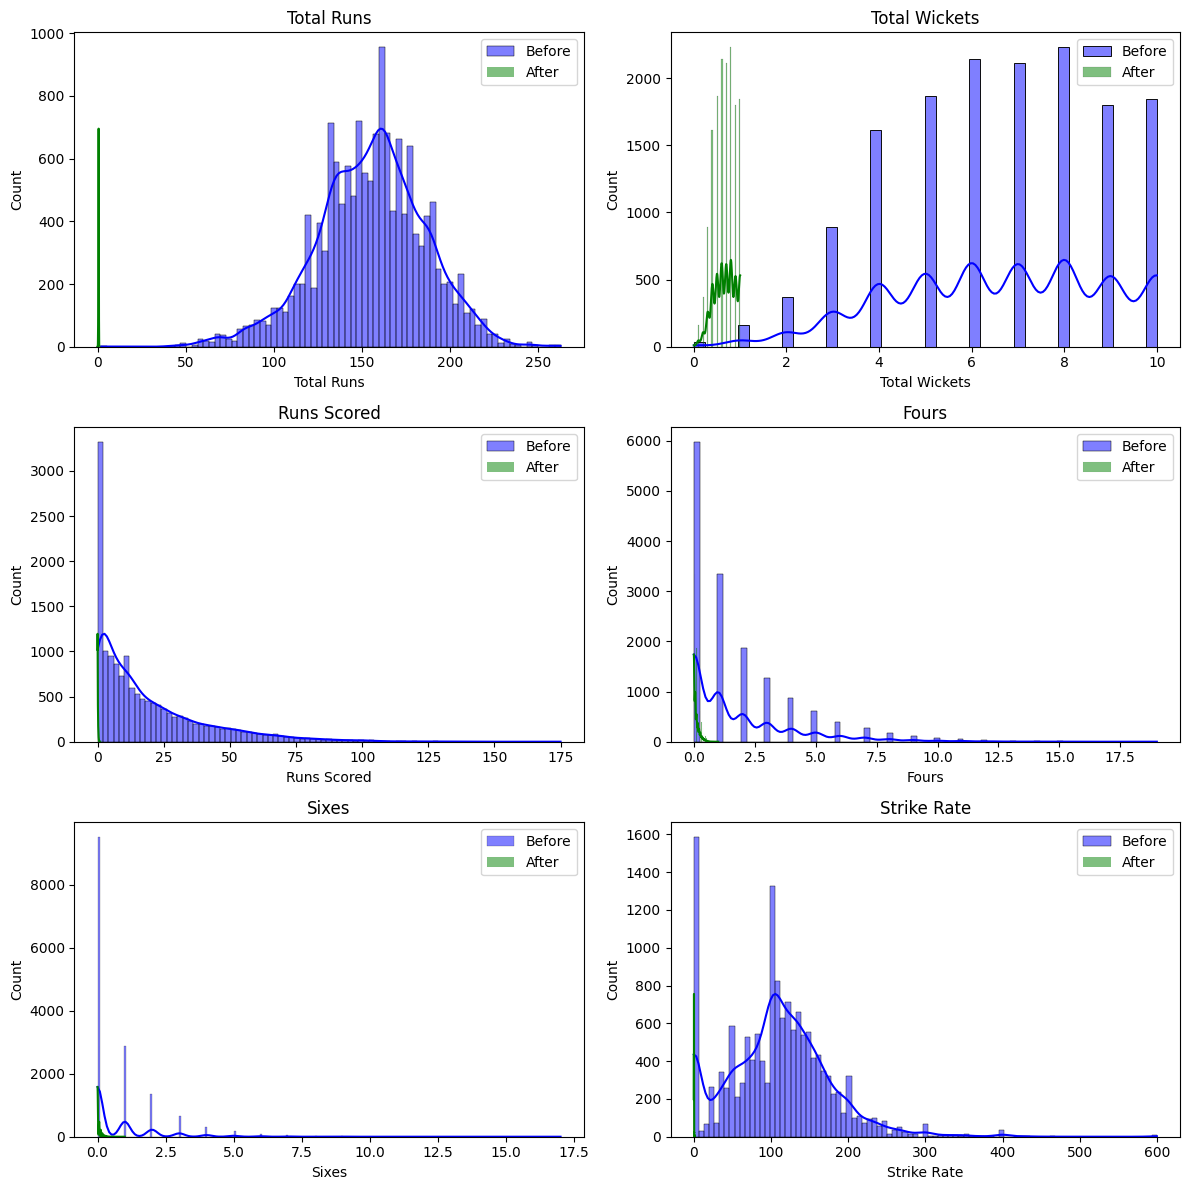

In [80]:
# Number of rows and columns for the subplots
num_features = len(features_to_normalize)
num_rows = num_features // 2 + num_features % 2

# Set up the matplotlib figure
plt.figure(figsize=(12, 4 * num_rows))

# Plotting before and after normalization
for i, feature in enumerate(features_to_normalize, 1):
    # Before Normalization
    plt.subplot(num_rows, 2, i)
    sns.histplot(df[feature], kde=True, color="blue", label="Before")
    plt.title(feature)
    plt.legend()

    # After Normalization
    plt.subplot(num_rows, 2, i)
    sns.histplot(df_normalized[feature], kde=True, color="green", label="After")
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()


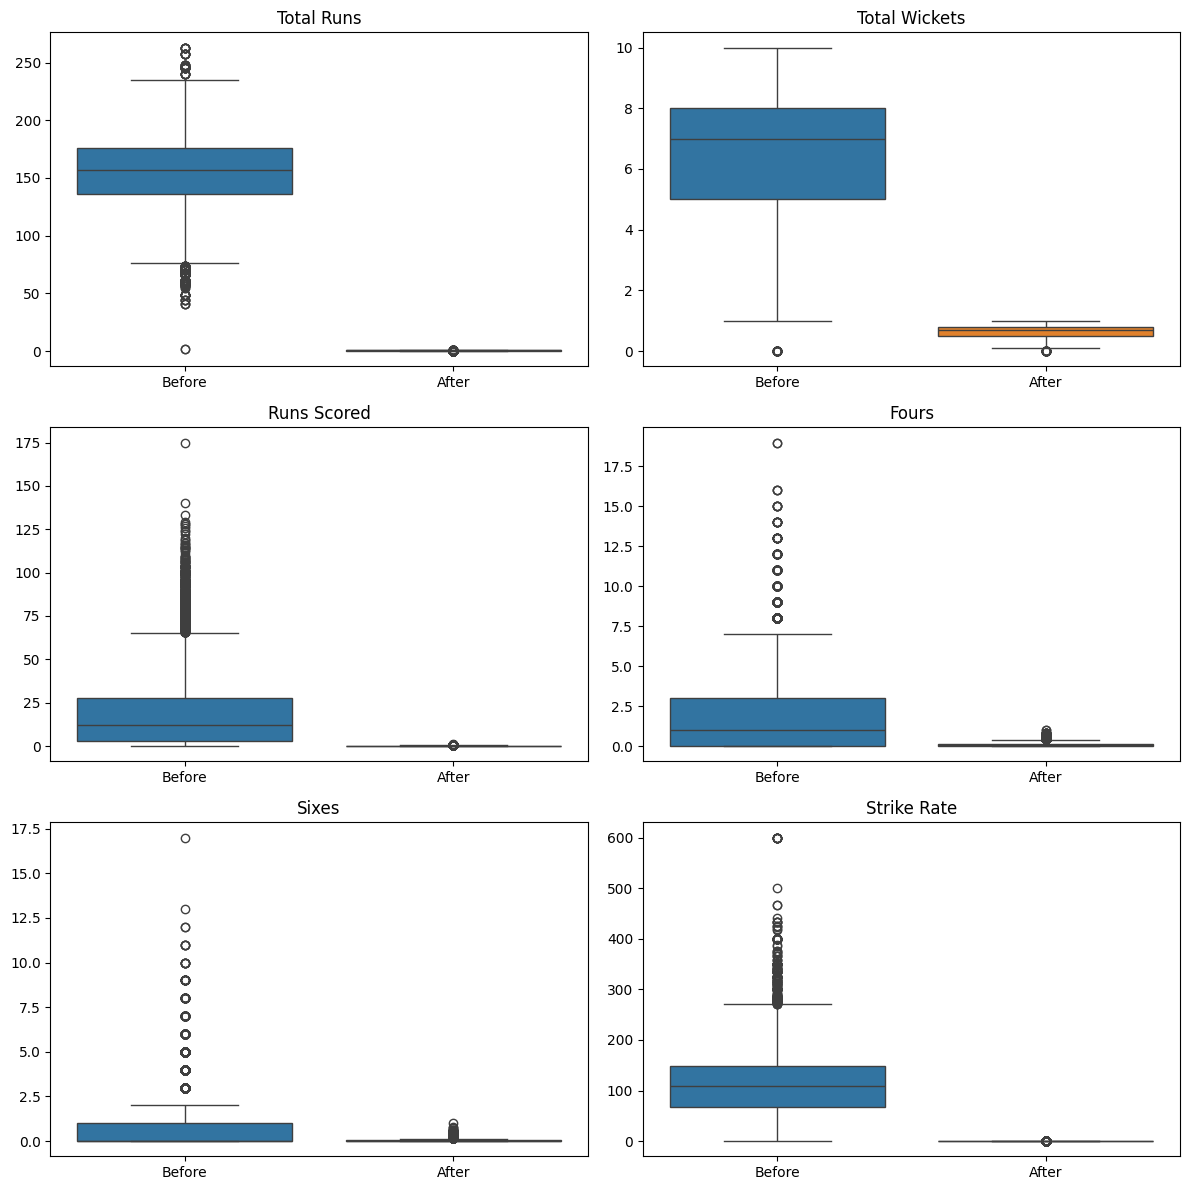

In [97]:
# Number of rows for the subplots
num_features = len(features_to_normalize)
num_rows = num_features // 2 + num_features % 2

# Set up the matplotlib figure
plt.figure(figsize=(12, 4 * num_rows))

# Plotting before and after normalization
for i, feature in enumerate(features_to_normalize, 1):
    # Create a subplot for each feature
    plt.subplot(num_rows, 2, i)

    # Combine the original and normalized data for the box plot
    combined_data = pd.concat([df[feature].rename('Before'), df_normalized[feature].rename('After')], axis=1)

    # Create the box plot
    sns.boxplot(data=combined_data)
    plt.title(feature)

plt.tight_layout()
plt.show()


## Label encoding categorical variables

In [98]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:", categorical_columns)

Categorical Variables: Index(['Date', 'Time', 'Stadium', 'City', 'Match Details', 'Team 1', 'Team 2',
       'Team Batting', 'Batsman Names', 'Out/Not Out'],
      dtype='object')


1. One Hot Encoding

In [99]:
print(df.columns)

Index(['IPL Edition', 'Date', 'Time', 'Stadium', 'City', 'Match Details',
       'Team 1', 'Team 2', 'Team Batting', 'Total Runs', 'Total Wickets',
       'Batsman Names', 'Out/Not Out', 'Balls Played', 'Runs Scored', 'Fours',
       'Sixes', 'Strike Rate'],
      dtype='object')


In [100]:
one_hot_encoded_columns = ['Team 1', 'Team 2', 'Out/Not Out', 'City', 'Stadium', 'Team Batting' ]
df = pd.get_dummies(df, columns=one_hot_encoded_columns)


2. Label Encoding

In [101]:

label_encoder = LabelEncoder()
df['Batsman Names'] = label_encoder.fit_transform(df['Batsman Names'])
df['Match Details'] = label_encoder.fit_transform(df['Match Details'])


3. Custom Encoding

In [102]:
def parse_time(time):
    # Convert non-string types to string
    time_str = str(time)

    # Check if 'AM/PM' is in the time string
    if 'AM' in time_str or 'PM' in time_str:
        return pd.to_datetime(time_str, format='%I:%M %p').hour
    else:
        try:
            # Try parsing with '%H:%M'
            return pd.to_datetime(time_str, format='%H:%M').hour
        except ValueError:
            # If it fails, handle as hour only (assuming it's a valid integer)
            return int(time)

# Custom encoding for 'Date'
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month

# Custom encoding for 'Time'
df['Time'] = df['Time'].apply(parse_time)


In [103]:
df.head()

,IPL Edition,Date,Time,Match Details,Total Runs,Total Wickets,Batsman Names,Balls Played,Runs Scored,Fours,...,Team Batting_Mumbai Indians Innings,Team Batting_Pune Warriors Innings,Team Batting_Punjab Kings Innings,Team Batting_Rajasthan Royals Innings,Team Batting_Rising Pune Supergiant Innings,Team Batting_Rising Pune Supergiants Innings,Team Batting_Royal Challengers Bangalore Innings,Team Batting_Sunrisers Hyderabad Innings,Day_of_Week,Month
0,2023,2023-03-31,19,266,178,7,174,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,Friday,3
1,2023,2023-03-31,19,266,178,7,670,50.0,92.0,4.0,...,0,0,0,0,0,0,0,0,Friday,3
2,2023,2023-03-31,19,266,178,7,486,17.0,23.0,4.0,...,0,0,0,0,0,0,0,0,Friday,3
3,2023,2023-03-31,19,266,178,7,781,6.0,7.0,1.0,...,0,0,0,0,0,0,0,0,Friday,3
4,2023,2023-03-31,19,266,178,7,636,12.0,12.0,0.0,...,0,0,0,0,0,0,0,0,Friday,3


In [114]:
df = df.drop(['Date', 'Time', 'Day_of_Week', 'Month'], axis=1)


## Model Implementation

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Assuming 'Runs Scored' is the target variable
X = df.drop('Runs Scored', axis=1)  # Features
y = df['Runs Scored']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


## Model Evaluation

In [116]:
# For regression models
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 1.1690548299526115e+20
R-squared: -2.6660194510293578e+17


## Visualisation

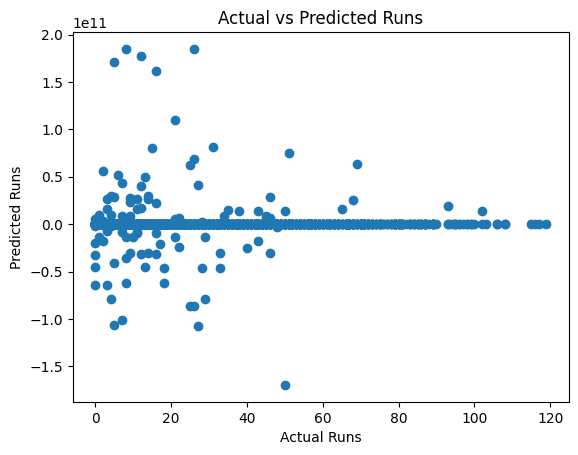

In [117]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


# Conclusion

The provided notebook, discusses the importance of data quality in machine learning and demonstrates various data cleaning, normalization, and imputation techniques using a dataset from the Indian Premier League (IPL) 2023 season.

The dataset, 'batting statistics.csv', contains detailed batting statistics of players participating in the season. The data includes player names, runs scored, balls faced, number of boundaries, strike rates, and other key batting metrics. The notebook emphasizes the importance of data cleaning, normalization, handling missing data, feature engineering, model selection and training, model evaluation and interpretation, and communication and visualization in data science

The notebook demonstrates how to handle missing data by filling in missing values with the mode for categorical variables like 'Batsman Names' and 'Out/Not Out'. For numerical variables like 'Balls Played', 'Runs Scored', 'Fours', 'Sixes', and 'Strike Rate', the notebook shows how to convert non-numeric data to NaN and then impute missing values using the median

In conclusion, the notebook provides a comprehensive guide on how to handle data quality issues in machine learning using a real-world dataset. It emphasizes the importance of data cleaning, normalization, and imputation techniques in ensuring high-quality data, which directly influences the reliability and performance of machine learning models. The practical example using the IPL 2023 season dataset serves as an excellent demonstration of these techniques.

#MIT License

Copyright (c) 2024 Kodand Ram Movva

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.